In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mglearn
import warnings
warnings.filterwarnings('ignore')

In [25]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
clf = KNeighborsClassifier(n_neighbors=3)

In [27]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [28]:
print('Test predictions are : {}'.format(clf.predict(X_test)))

Test predictions are : [1 0 1 0 1 0 0]


In [29]:
print('test accuracy is : {:.2f}'.format(clf.score(X_test, y_test)))

test accuracy is : 0.86


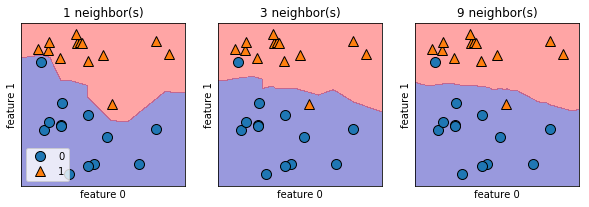

In [33]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10, 3)) 
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate 
    # and fit in one line 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax) 
    ax.set_title("{} neighbor(s)".format(n_neighbors)) 
    ax.set_xlabel("feature 0") 
    ax.set_ylabel("feature 1") 
    axes[0].legend(loc=3)

## building pipelines

In [19]:
from sklearn.svm import SVC 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# load and split the data 
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0)

In [9]:
from sklearn.pipeline import Pipeline 
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [16]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [17]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5) 
grid.fit(X_train, y_train) 
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_)) 
print("Test set score: {:.2f}".format(grid.score(X_test, y_test))) 
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.98
Test set score: 0.97
Best parameters: {'svm__C': 1, 'svm__gamma': 1}


## Grid Searching which model to use

In [28]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [29]:
from sklearn.ensemble import RandomForestClassifier 
#choosing between standard scaler and minmax scaler to see which one does well
param_grid = [ {'classifier': [SVC()], 'preprocessing': [StandardScaler(), MinMaxScaler()], 
                'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100], 
                'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}, 
              {'classifier': [RandomForestClassifier(n_estimators=100)], 
               'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]


In [30]:
cancer = load_breast_cancer() 

X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0) 
grid = GridSearchCV(pipe, param_grid, cv=5) 
grid.fit(X_train, y_train) 
print("Best params:\n{}\n".format(grid.best_params_)) 
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.99
Test-set score: 0.98
